In [1]:
# Imports and inputs
import h5py
import matplotlib.pyplot as plt
import numpy as np

h5File = r'C:\Users\alam\Desktop\EOIRData\VNP46A2.A2021045.h08v06.001.2021104025532.h5'
outputFile = r'C:\Users\alam\Desktop\EOIRData\RadianceData.csv'

In [7]:
h5 = h5py.File(h5File, 'r')

# Print attributes to find GRingPointLongitude and GRingPointLatitude to find corner points
print(h5.attrs.keys())
boundingLat = h5.attrs['GRingPointLatitude']
boundingLon = h5.attrs['GRingPointLongitude']

<KeysViewHDF5 ['AlgorithmType', 'DataResolution', 'DayNightFlag', 'EastBoundingCoord', 'EndTime', 'GRingPointLatitude', 'GRingPointLongitude', 'GranuleDayNightFlag', 'HorizontalTileNumber', 'InputPointer', 'LSIPS_AlgorithmVersion', 'LocalGranuleID', 'LongName', 'NorthBoundingCoord', 'PGENumber', 'PGEVersion', 'PGE_EndTime', 'PGE_Name', 'PGE_StartTime', 'PlatformShortName', 'ProcessingCenter', 'ProcessingEnvironment', 'ProductionTime', 'RangeBeginningDate', 'RangeBeginningTime', 'RangeEndingDate', 'RangeEndingTime', 'SatelliteInstrument', 'SensorShortname', 'ShortName', 'SouthBoundingCoord', 'StartTime', 'TileID', 'VersionID', 'VerticalTileNumber', 'WestBoundingCoord', 'identifier_product_doi', 'identifier_product_doi_authority']>


In [17]:
# Use the .keys() method to continue indexing down until the desired dataset is found
print(h5['HDFEOS']['GRIDS']['VNP_Grid_DNB']['Data Fields'].keys())

<KeysViewHDF5 ['DNB_BRDF-Corrected_NTL', 'DNB_Lunar_Irradiance', 'Gap_Filled_DNB_BRDF-Corrected_NTL', 'Latest_High_Quality_Retrieval', 'Mandatory_Quality_Flag', 'QF_Cloud_Mask', 'Snow_Flag']>


In [21]:
# Print attributes to find data-specific metadata and store them in variables
print(h5['HDFEOS']['GRIDS']['VNP_Grid_DNB']['Data Fields']['Gap_Filled_DNB_BRDF-Corrected_NTL'].attrs.keys())
fillValue = h5['HDFEOS']['GRIDS']['VNP_Grid_DNB']['Data Fields']['Gap_Filled_DNB_BRDF-Corrected_NTL'].attrs['_FillValue']
offset = h5['HDFEOS']['GRIDS']['VNP_Grid_DNB']['Data Fields']['Gap_Filled_DNB_BRDF-Corrected_NTL'].attrs['offset']
scale_factor = h5['HDFEOS']['GRIDS']['VNP_Grid_DNB']['Data Fields']['Gap_Filled_DNB_BRDF-Corrected_NTL'].attrs['scale_factor']
units = h5['HDFEOS']['GRIDS']['VNP_Grid_DNB']['Data Fields']['Gap_Filled_DNB_BRDF-Corrected_NTL'].attrs['units']

<KeysViewHDF5 ['_FillValue', 'long_name', 'offset', 'scale_factor', 'units', 'valid_range']>


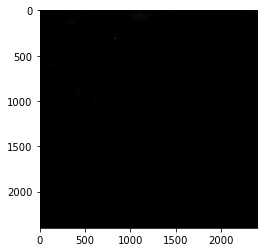

In [31]:
# Get night lights data and update fill value to 0 radiance
data = np.array(h5['HDFEOS']['GRIDS']['VNP_Grid_DNB']['Data Fields']['Gap_Filled_DNB_BRDF-Corrected_NTL'])
data[data == fillValue] = 0

# Apply scale factor, convert nW to W, and then divide by VIIRS DNB bandwidth of 0.4 um
data = data * scale_factor * 1e-9 / 0.4

# Write to csv and show image
np.savetxt(outputFile,data, delimiter=",", fmt="%1g")
plt.imshow(data, cmap="gray")